In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# cargamos todos los conjuntos de datos: 

df_dia = pd.read_csv("../files/productos_dia.csv", index_col = 0)
df_precios = pd.read_csv("../files/precios_productos.csv", index_col = 0)


In [3]:
df_precios.head()

,price,reference_price,product_id,reference_unit,insert_date
6837303,"0,7","0,7",9b1d806ddaed2a3b4c842c361e9171a8,ud,2022-06-08 00:00:00
5137438,"3,19","10,63",baf038a3f001812899adb8beaf4e0ec7,kg,2022-02-10 00:00:00
6005999,"3,99","15,96",ca2fc753e5ea44e8c95888983c1dafe1,l,2022-04-11 00:00:00
6995217,"3,39","5,22",48c959cc94d6d82d1151189b2abe9e83,l,2022-06-19 00:00:00
5760664,"2,79","0,47",8904722366039ba8f147e2e75a5d1ce1,ud,2022-03-25 00:00:00


In [4]:
df_dia.head(2)

,url,supermarket,name,description,product_id
2362486,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN,9e2fda45e63337294f2a604178823026
2362487,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,DIA lavavajillas máquina premium todo en uno e...,NaN,244994c762813d38881cb118742152a2


In [5]:
df_dia.duplicated().sum()

0

In [6]:
df_precios.head(2)

,price,reference_price,product_id,reference_unit,insert_date
6837303,"0,7","0,7",9b1d806ddaed2a3b4c842c361e9171a8,ud,2022-06-08 00:00:00
5137438,"3,19","10,63",baf038a3f001812899adb8beaf4e0ec7,kg,2022-02-10 00:00:00


In [7]:
df_precios.duplicated().sum()

0

In [8]:
df_final2 = df_precios.merge(df_dia, on =["product_id"], how = "right")
df_final2.sample(5)

,price,reference_price,product_id,reference_unit,insert_date,url,supermarket,name,description
1034449,"3,55","11,83",f3d26f332696d7caba2be1840db536bc,kg,2021-10-30 00:00:00,https://www.dia.es/compra-online/frescos/charc...,dia-es,DIA EL CENCERRO queso de oveja viejo con leche...,NaN
1048303,"1,25","16,67",30d5d4d8b3105ddf40edae6295187bba,kg,2021-11-12 00:00:00,https://www.dia.es/compra-online/dulces-de-nav...,dia-es,WINDEL calendario adviento caja 75 gr (modelo ...,NaN
166844,"2,65","22,08",94b64f5961f0bd42ca8ceb3a9400296a,kg,2022-04-21 00:00:00,https://www.dia.es/compra-online/despensa/desa...,dia-es,KELLOGGS barrita de cereales choco krispies es...,NaN
381909,"1,79","2,39",f93feb2842a593f85b46d682ee83608e,l,2022-06-27 00:00:00,https://www.dia.es/compra-online/bebe/cuidado-...,dia-es,BABYSMILE colonia infantil botella 750 ml,NaN
1139572,"1,25","7,35",f54e0781493e3422e2df156ec9c7c47b,kg,2022-06-09 00:00:00,https://www.dia.es/compra-online/despensa/aper...,dia-es,DIA SNACK MANIAC patatas fritas campesinas bol...,NaN


In [9]:
df_final2.shape

(1264539, 9)

In [9]:
df_final2.duplicated().sum()

0

# Cleaning

**Cambiar tipo de dato**

In [10]:
columnas = ["price", "reference_price"]

for i in columnas: 
    df_final2[i] = df_final2[i].str.replace(",", ".")

In [11]:
df_final2.head()

,price,reference_price,product_id,reference_unit,insert_date,url,supermarket,name,description
0,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-02 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN
1,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-03 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN
2,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-04 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN
3,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-05 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN
4,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-06 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN


In [12]:
df_final2.dtypes

price               object
reference_price     object
product_id          object
reference_unit      object
insert_date         object
url                 object
supermarket         object
name                object
description        float64
dtype: object

In [13]:
for i in columnas: 
    df_final2[i] = df_final2[i].astype(float)

In [14]:
df_final2.dtypes

price              float64
reference_price    float64
product_id          object
reference_unit      object
insert_date         object
url                 object
supermarket         object
name                object
description        float64
dtype: object

**Unidades** 

In [15]:
df_final2.reference_unit.unique()

array(['ud', 'l', 'kg', nan, 'lavado', 'm'], dtype=object)

In [16]:
df_final2[df_final2["reference_unit"] == "m"]

,price,reference_price,product_id,reference_unit,insert_date,url,supermarket,name,description
537925,1.25,1.25,e294e65ec57bfbb28c15518eca99f417,m,2021-08-03 00:00:00,https://www.dia.es/compra-online/cuidado-perso...,dia-es,BONTE seda dental menta y cera caja 50 metros,NaN
537926,1.25,1.25,e294e65ec57bfbb28c15518eca99f417,m,2021-08-04 00:00:00,https://www.dia.es/compra-online/cuidado-perso...,dia-es,BONTE seda dental menta y cera caja 50 metros,NaN
537927,1.25,1.25,e294e65ec57bfbb28c15518eca99f417,m,2021-08-05 00:00:00,https://www.dia.es/compra-online/cuidado-perso...,dia-es,BONTE seda dental menta y cera caja 50 metros,NaN
537928,1.25,1.25,e294e65ec57bfbb28c15518eca99f417,m,2021-08-06 00:00:00,https://www.dia.es/compra-online/cuidado-perso...,dia-es,BONTE seda dental menta y cera caja 50 metros,NaN
537929,1.25,1.25,e294e65ec57bfbb28c15518eca99f417,m,2021-08-07 00:00:00,https://www.dia.es/compra-online/cuidado-perso...,dia-es,BONTE seda dental menta y cera caja 50 metros,NaN
...,...,...,...,...,...,...,...,...,...
2371891,5.05,0.10,f664b7b52a75075301c4cfe40ef98b3a,m,2022-08-14 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,ALUMFIX papel de aluminio rollo 50 m,NaN
2371892,5.05,0.10,f664b7b52a75075301c4cfe40ef98b3a,m,2022-08-15 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,ALUMFIX papel de aluminio rollo 50 m,NaN
2371893,5.05,0.10,f664b7b52a75075301c4cfe40ef98b3a,m,2022-08-16 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,ALUMFIX papel de aluminio rollo 50 m,NaN
2371894,5.05,0.10,f664b7b52a75075301c4cfe40ef98b3a,m,2022-08-17 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,ALUMFIX papel de aluminio rollo 50 m,NaN


In [17]:
df_final2[df_final2["reference_unit"] == "lavado"]

,price,reference_price,product_id,reference_unit,insert_date,url,supermarket,name,description
97595,5.10,0.14,06babee2a8fbb7f86eb1f3db7208bc85,lavado,2021-08-02 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,DIA detergente máquina polvo maleta 36 cacitos,NaN
97596,5.10,0.14,06babee2a8fbb7f86eb1f3db7208bc85,lavado,2021-08-03 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,DIA detergente máquina polvo maleta 36 cacitos,NaN
97597,5.10,0.14,06babee2a8fbb7f86eb1f3db7208bc85,lavado,2021-08-04 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,DIA detergente máquina polvo maleta 36 cacitos,NaN
97598,5.10,0.14,06babee2a8fbb7f86eb1f3db7208bc85,lavado,2021-08-05 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,DIA detergente máquina polvo maleta 36 cacitos,NaN
97599,5.10,0.14,06babee2a8fbb7f86eb1f3db7208bc85,lavado,2021-08-06 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,DIA detergente máquina polvo maleta 36 cacitos,NaN
...,...,...,...,...,...,...,...,...,...
2717011,5.99,0.15,6c08f337768f5a04c05d86856e46480d,lavado,2022-08-11 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,ELENA detergente maquina polvo maleta 30 + 12 ...,NaN
2717012,5.99,0.15,6c08f337768f5a04c05d86856e46480d,lavado,2022-08-13 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,ELENA detergente maquina polvo maleta 30 + 12 ...,NaN
2717013,5.99,0.15,6c08f337768f5a04c05d86856e46480d,lavado,2022-08-15 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,ELENA detergente maquina polvo maleta 30 + 12 ...,NaN
2717014,5.99,0.15,6c08f337768f5a04c05d86856e46480d,lavado,2022-08-16 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,ELENA detergente maquina polvo maleta 30 + 12 ...,NaN


**Para quitar la hora**



In [18]:
df_final2["date"] = df_final2["insert_date"].str.split(" ").str[0]
df_final2.head()

,price,reference_price,product_id,reference_unit,insert_date,url,supermarket,name,description,date
0,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-02 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN,2021-08-02
1,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-03 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN,2021-08-03
2,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-04 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN,2021-08-04
3,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-05 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN,2021-08-05
4,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-06 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN,2021-08-06


In [19]:
df_final2["date"] = pd.to_datetime(df_final2["date"])

In [20]:
df_final2.dtypes

price                     float64
reference_price           float64
product_id                 object
reference_unit             object
insert_date                object
url                        object
supermarket                object
name                       object
description               float64
date               datetime64[ns]
dtype: object

In [21]:
# otra opción usando una función: 

def separar_fecha(x):
    return x.split(" ")[0]

In [22]:
df_final2["date2"] = df_final2["insert_date"].apply(separar_fecha)
df_final2.head()

,price,reference_price,product_id,reference_unit,insert_date,url,supermarket,name,description,date,date2
0,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-02 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN,2021-08-02,2021-08-02
1,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-03 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN,2021-08-03,2021-08-03
2,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-04 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN,2021-08-04,2021-08-04
3,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-05 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN,2021-08-05,2021-08-05
4,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-06 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN,2021-08-06,2021-08-06


**Para calcular la diferencia de precios**

In [23]:
def sacar_diferencia(precio, precio_referencia):
    return precio_referencia - precio

In [24]:
df_final2["difference"] = df_final2.apply(lambda x: sacar_diferencia(x["price"], x["reference_price"]), axis = 1)
df_final2.head()

,price,reference_price,product_id,reference_unit,insert_date,url,supermarket,name,description,date,date2,difference
0,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-02 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN,2021-08-02,2021-08-02,0.0
1,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-03 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN,2021-08-03,2021-08-03,0.0
2,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-04 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN,2021-08-04,2021-08-04,0.0
3,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-05 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN,2021-08-05,2021-08-05,0.0
4,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-06 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN,2021-08-06,2021-08-06,0.0


**Para sacar categorías, subcategorias**

**Patrones de url**

In [25]:
df_final2["url"][0]

'https://www.dia.es/compra-online/cuidado-del-hogar/lavavajillas/p/181184'

In [26]:
df_final2["url"][7]

'https://www.dia.es/compra-online/cuidado-del-hogar/lavavajillas/p/181184'

In [27]:
df_final2["url"][410]

'https://www.dia.es/compra-online/cuidado-del-hogar/lavavajillas/p/255069'

In [28]:
def sacar_info(x):
    if "al-dia" in x:
        return "frescos", x.split("/")[5]

    elif "bulto-mixto" in x or "peso" in x or "caducidad" in x or "clasificacion-de-categorias" in x:
        return x.split("/")[5], x.split("/")[6]
        
    else:
        return x.split("/")[4], x.split("/")[5]

In [29]:
df_final2[["categoria","subcategoria"]] = df_final2.apply(lambda x: sacar_info(x["url"]), axis=1, result_type="expand")


: 

In [ ]:
df_final2["categoria"].unique()

array(['cuidado-del-hogar', 'cuidado-del-hogar-de-limpieza', 'mascotas',
       'frescos', 'platos-preparados', 'despensa', 'bebidas', 'bodega',
       'bebe', 'dieteticos', 'congelados', 'cuidado-personal', 'eco',
       'dulces-de-navidad', 'desayunos-y-dulces', 'cuidado-corporal',
       'conservas'], dtype=object)

In [ ]:
def reemplazar(x):
    if x == 'cuidado-del-hogar-de-limpieza':
        return 'cuidado-del-hogar'
    else:
        return x

In [ ]:
df_final2["categoria"] = df_final2["categoria"].apply(reemplazar)

In [ ]:
df_final2.head(1)

,price,reference_price,product_id,reference_unit,insert_date,url,supermarket,name,description,date2,difference,categoria,subcategoria
0,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-02 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN,2021-08-02,0.0,cuidado-del-hogar,lavavajillas


# Resultados

## Análisis temporal de los precios

In [ ]:
df_final2.head(2)

,price,reference_price,product_id,reference_unit,insert_date,url,supermarket,name,description,date2,difference,categoria,subcategoria
0,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-02 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN,2021-08-02,0.0,cuidado-del-hogar,lavavajillas
1,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-03 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN,2021-08-03,0.0,cuidado-del-hogar,lavavajillas


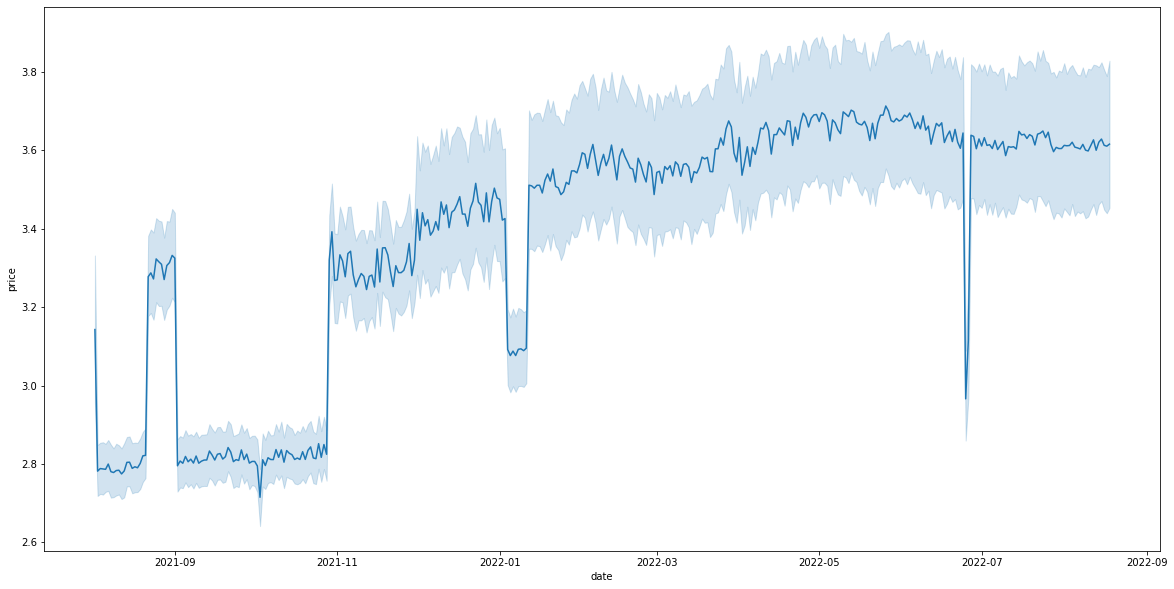

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df_final2, x="date", y="price");

In [ ]:
import calendar
m = calendar.month_name[1:]
print(m)

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


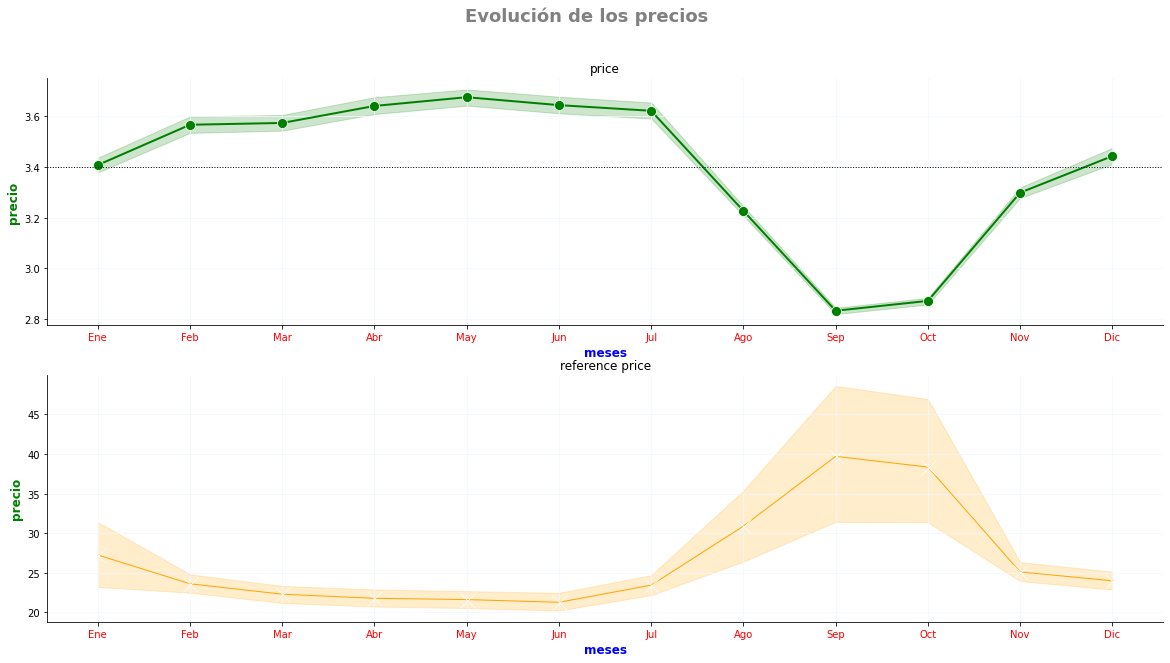

In [ ]:
# hagamos un subplot con el price y el reference price


fig, ax = plt.subplots(nrows = 2, ncols = 1,  figsize = (20, 10))

sns.lineplot(x=df_final2["date"].dt.month, y=df_final2["price"], 
            color = "green", # color de la linea
            ax = ax[0], 
            marker = "o", # para especificar que marcador queremos
            markersize = 10, # para establecer el tamaño del marcador
            linewidth = 2 # para cambiar el grosor de la linea
            )



sns.lineplot(x=df_final2["date"].dt.month, y=df_final2["reference_price"], 
            color = "orange", 
            ax = ax[1], 
            marker = "x", 
            markersize = 15,
            linewidth = 1
            )

# para el título de todas las gráficas
fig.suptitle('Evolución de los precios', color = "grey", fontweight='bold', fontsize = 18)

# para cambiar el título de los subplots
ax[0].title.set_text('price')
ax[1].title.set_text("reference price")

# para cambiar las etiquetas del eje x y sus colores y tamaños
ax[0].set_xticks(np.sort(df_final2["date"].dt.month.unique()),  # valores originales del eje x
            ['Ene', "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"] , color = "red", fontsize = 10); # valores nuevos que queremos en el eje x

# para cambiar las etiqeutas del eje y
ax[1].set_xticks(np.sort(df_final2["date"].dt.month.unique()),  
            ['Ene', "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"], color = "red", fontsize = 10)

# para cambiar el nobre el eje x
ax[0].set_xlabel('meses', color = "blue", fontweight = "bold", fontsize = 12)
ax[1].set_xlabel('meses', color = "blue", fontweight = "bold", fontsize = 12)

# para cambiar el nobre el eje y
ax[0].set_ylabel('precio', color = "green", fontweight = "bold", fontsize = 12)
ax[1].set_ylabel('precio', color = "green", fontweight = "bold", fontsize = 12)


# para quitar los ejes de arriba y de la derecha         
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)        

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

# para añadir un grid/rejilla a la gráfica
ax[0].grid(visible=True, color = "aliceblue")
ax[1].grid(visible=True, color = "aliceblue")

media = df_final2["price"].mean()


# para añadir una linea fija en el plot
ax[0].axhline(media, color='black', linewidth=1, linestyle='dotted'); # las opciones que tenemos de estilo de linea '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

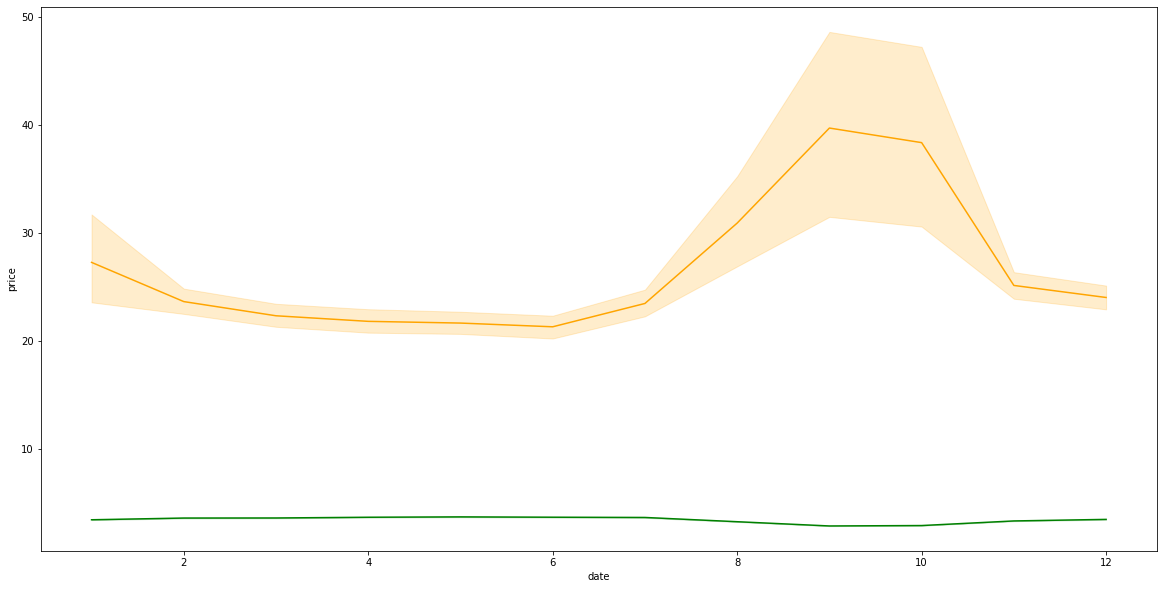

In [ ]:
# si queremos meter dos lineas en un único plot. 

plt.figure(figsize=(20, 10))
sns.lineplot(x=df_final2["date"].dt.month, y=df_final2["price"], color = "green")
sns.lineplot(x=df_final2["date"].dt.month, y=df_final2["reference_price"], color = "orange");



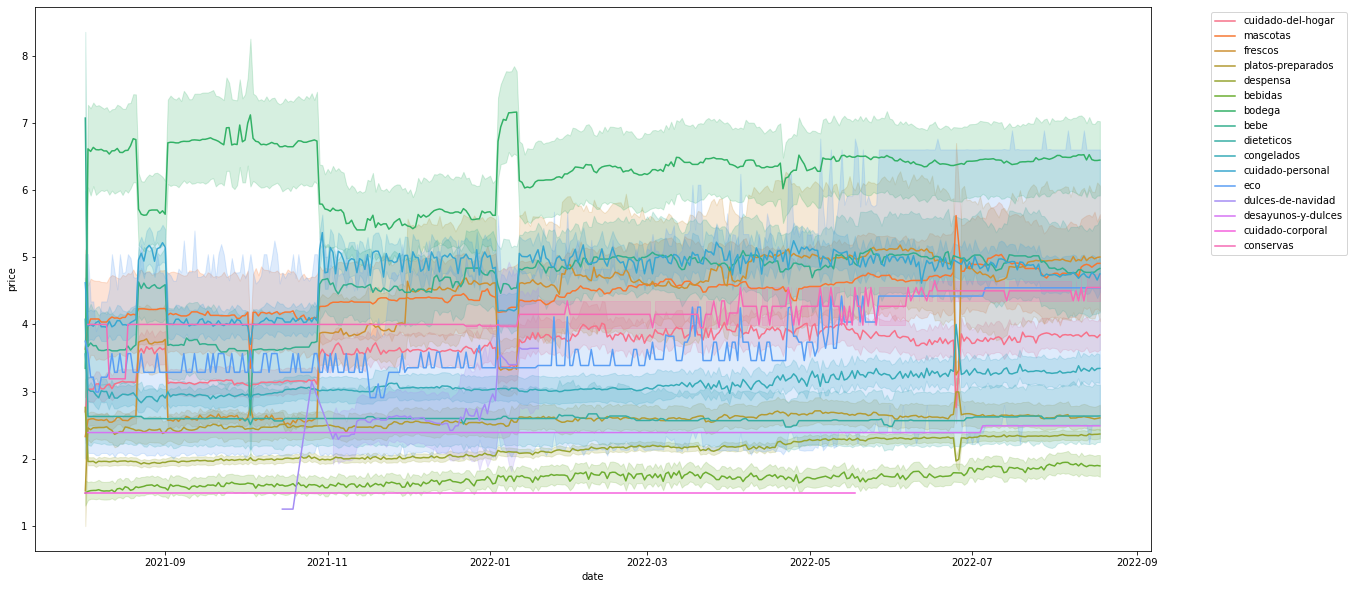

In [ ]:
# pongamos en práctica mover la leyenda de la gráfica. En este caso vamos a crear la misma gráfica que la anterior, pero con una línea para cada categoría

plt.figure(figsize=(20, 10))
sns.lineplot(x=df_final2["date"],
             y=df_final2["price"], 
             hue = df_final2["categoria"])
             
plt.legend(bbox_to_anchor=(1.05, 1)); # las coordenadas de donde queremos poner la leyenda. EL orden: eje-x, eje-y

# otra forma
#plt.legend(loc='upper left') # otras opciones: 'upper right', 'lower left', 'lower right', upper center', 'lower center', 'center left', 'center right', 'center'



             

## Relación entre el precio y el precio de referencia

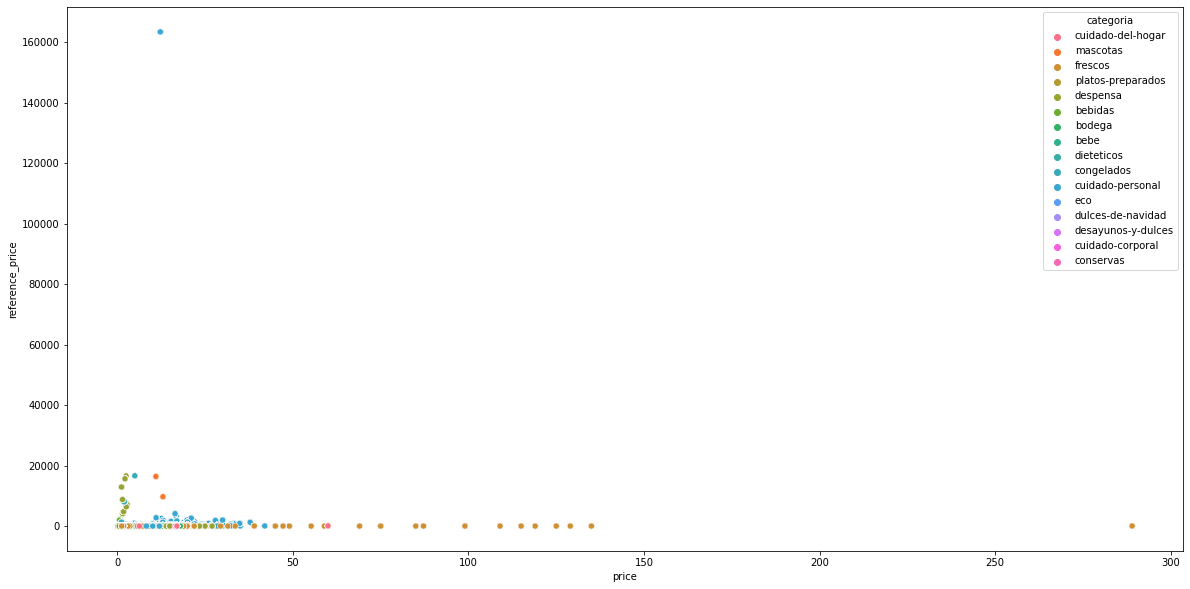

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data = df_final2, x = "price", y = "reference_price", hue = "categoria");

In [ ]:
df2 = df_final2[df_final2["reference_price"] < 20000]
df2.head()

,price,reference_price,product_id,reference_unit,insert_date,url,supermarket,name,description,date,date2,difference,categoria,subcategoria
0,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-02 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN,2021-08-02,2021-08-02,0.0,cuidado-del-hogar,lavavajillas
1,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-03 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN,2021-08-03,2021-08-03,0.0,cuidado-del-hogar,lavavajillas
2,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-04 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN,2021-08-04,2021-08-04,0.0,cuidado-del-hogar,lavavajillas
3,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-05 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN,2021-08-05,2021-08-05,0.0,cuidado-del-hogar,lavavajillas
4,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-06 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN,2021-08-06,2021-08-06,0.0,cuidado-del-hogar,lavavajillas


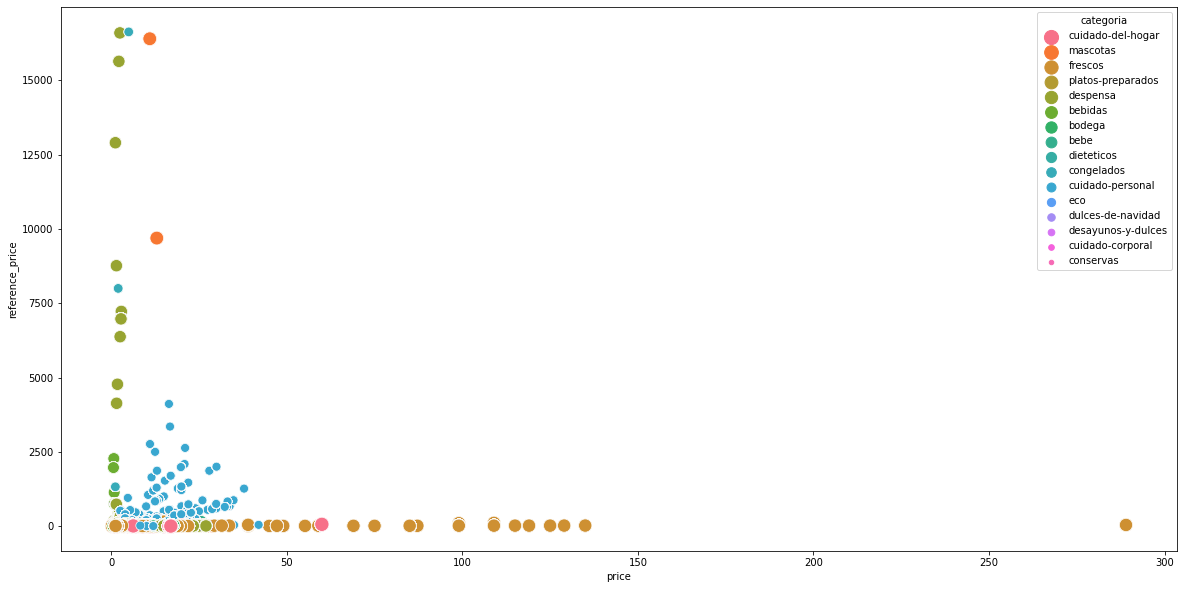

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data = df2, x = "price", y = "reference_price", hue = "categoria", size = "categoria",  sizes=(20, 200));

In [ ]:
# analíticamente con numpy
np.corrcoef(df2["price"], df2["reference_price"])

array([[1.        , 0.06091017],
       [0.06091017, 1.        ]])

In [ ]:
# analíticamente con pandas

df2[["price", "reference_price"]].corr()

,price,reference_price
price,1.00000,0.06091
reference_price,0.06091,1.00000


## Análisis de categorías

In [ ]:
df_final2.head(2)

,price,reference_price,product_id,reference_unit,insert_date,url,supermarket,name,description,date,date2,difference,categoria,subcategoria
0,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-02 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN,2021-08-02,2021-08-02,0.0,cuidado-del-hogar,lavavajillas
1,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-03 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN,2021-08-03,2021-08-03,0.0,cuidado-del-hogar,lavavajillas


**¿Qué categorías son las que más tenemos?**

In [ ]:
df_final2.groupby(["categoria"]).count()

,price,reference_price,product_id,reference_unit,insert_date,url,supermarket,name,description,date,date2,difference,subcategoria
categoria,,,,,,,,,,,,,
bebe,82035,82035,82035,82035,82035,82035,82035,82035,0,82035,82035,82035,82035
bebidas,203873,203873,203873,203873,203873,203873,203873,203873,0,203873,203873,203873,203873
bodega,111519,111519,111519,111519,111519,111519,111519,111519,0,111519,111519,111519,111519
congelados,113828,113828,113828,113692,113828,113828,113828,113828,0,113828,113828,113828,113828
conservas,577,577,577,577,577,577,577,577,0,577,577,577,577
cuidado-corporal,283,283,283,283,283,283,283,283,0,283,283,283,283
cuidado-del-hogar,219765,219765,219765,219765,219765,219765,219765,219765,0,219765,219765,219765,219765
cuidado-personal,458494,458494,458494,456173,458494,458494,458494,458494,0,458494,458494,458494,458494
desayunos-y-dulces,379,379,379,379,379,379,379,379,0,379,379,379,379


In [ ]:
# lo podemos hacer un size también  que es lo mismo que el count, pero sin darme la información para cada columna. 
df_categoria = df_final2.groupby(["categoria"]).size().reset_index()
df_categoria.columns = ["categoria", "conteo"]
df_categoria.sort_values(by ="conteo", inplace=True, ascending = False)
df_categoria.head(2)

,categoria,conteo
9,despensa,921962
13,frescos,472037


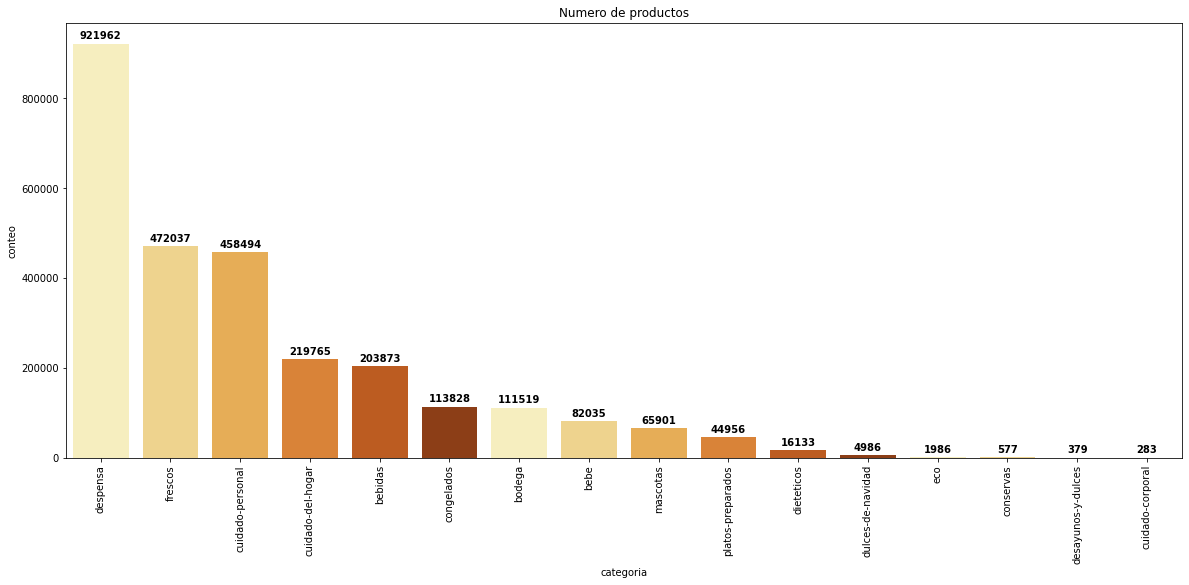

In [ ]:
# Como lo veríamos visualmente

plt.figure(figsize =(20,8)) # para establecer el tamaño de la gráfica
sns.barplot(data = df_categoria, x = "categoria", y = "conteo", palette=sns.color_palette("YlOrBr")) 
plt.xticks(rotation=90) # para girar las etiquetas del eje-x
plt.title("Numero de productos")

# para poner etiquetas encima de las barras
for indice, valor in enumerate(df_categoria["conteo"]):
    plt.text(indice, valor + 10000, str(valor),
             horizontalalignment='center', # para colocarlo en el centro de la barra
             fontweight = "bold") 

plt.show();

**Dentro de cada categoría, ¿Qué subcategorías son más populares?**

In [ ]:
df_categoria_subcategoria = df_final2.groupby(["categoria", "subcategoria"]).size().reset_index()
df_categoria_subcategoria.rename(columns={0:"conteo"}, inplace=True)
df_categoria_subcategoria.sort_values(by = "conteo", ascending=False, inplace=True)
df_categoria_subcategoria.head(2)

,categoria,subcategoria,conteo
54,despensa,desayunos-y-dulces,359676
41,cuidado-personal,bano-e-higiene-personal,205864


In [ ]:
#plt.figure(figsize =(20,8))
#sns.barplot(data = df_categoria_subcategoria, x = "categoria", y = "conteo", hue = "subcategoria", palette=sns.color_palette("YlOrBr"))
#plt.xticks(rotation=90)
#plt.show();

In [ ]:
df_final2.head(2)

,price,reference_price,product_id,reference_unit,insert_date,url,supermarket,name,description,date,date2,difference,categoria,subcategoria
0,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-02 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN,2021-08-02,2021-08-02,0.0,cuidado-del-hogar,lavavajillas
1,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-03 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN,2021-08-03,2021-08-03,0.0,cuidado-del-hogar,lavavajillas


In [ ]:
def caract_graficas(titulo, nombre_eje_x, nombre_eje_y, rotacion = 90, tamaño = (20,8)):
        
        font_title = {'family': 'garamond',
            'color':  'black',
            'weight': 'bold', # puede ser bold, normal, medium
            'size': 16,
            'style' : "italic",
            }
        
        font_axis = {'family': 'garamond',
            'color':  'red',
            'weight': 'normal', # puede ser bold, normal, medium
            'size': 12
            }

        plt.figure(figsize=tamaño)

        plt.title(titulo, fontdict= font_title)
        plt.ylabel( nombre_eje_y, fontdict = font_axis)
        plt.xlabel( nombre_eje_x, fontdict = font_axis)

        plt.tick_params(axis='both', labelsize=12)

        plt.xticks(rotation=rotacion)

In [ ]:
def crear_grafica(df ,eje_x, eje_y, tipo_grafica = "barplot", paleta_color = "YlOrBr" ):

    tipo_grafica = tipo_grafica.lower()

    pregunta = input("Quieres hacer la gráfica con un filtro por categoria (S/N): ")


    if pregunta == "S":

        categoria = input("¿Sobre que categoría quieres hacer las gráficas?")
        titulo = input("Que titulo le quieres poner a tu gráfica: ")

        df = df[df["categoria"] == categoria]

        if tipo_grafica == "barplot":
            caract_graficas( titulo, "subcategoria", "price")
            sns.barplot(data = df, x = eje_x, y = eje_y, palette=sns.color_palette(paleta_color))
            
        elif tipo_grafica == "violinplot":
            caract_graficas( titulo,  "price", "platos_preparados")
            sns.violinplot(data = df, x = eje_x, y = eje_y, palette=sns.color_palette(paleta_color))  
        elif tipo_grafica == "boxplot":
            caract_graficas( titulo, "price", "platos_preparados")
            sns.boxplot(data = df, x = eje_x, y = eje_y, palette=sns.color_palette(paleta_color))  

        elif tipo_grafica == "scatterplot":
            caract_graficas( titulo, "price", "platos_preparados")
            sns.scatterplot(data=df, x = eje_x, y= eje_y)

    else: 
        pass
    


In [ ]:
df_final2.categoria.unique()

array(['cuidado-del-hogar', 'mascotas', 'frescos', 'platos-preparados',
       'despensa', 'bebidas', 'bodega', 'bebe', 'dieteticos',
       'congelados', 'cuidado-personal', 'eco', 'dulces-de-navidad',
       'desayunos-y-dulces', 'cuidado-corporal', 'conservas'],
      dtype=object)

findfont: Font family ['garamond'] not found. Falling back to DejaVu Sans.
findfont: Font family ['garamond'] not found. Falling back to DejaVu Sans.


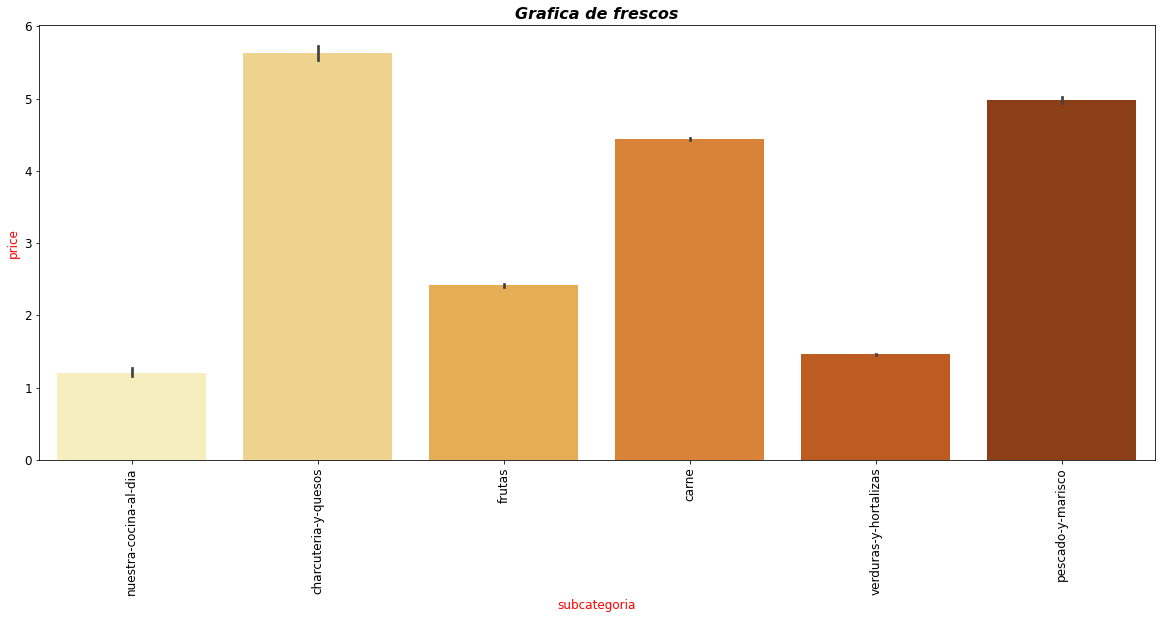

In [ ]:
crear_grafica(df_final2, "subcategoria", "price")

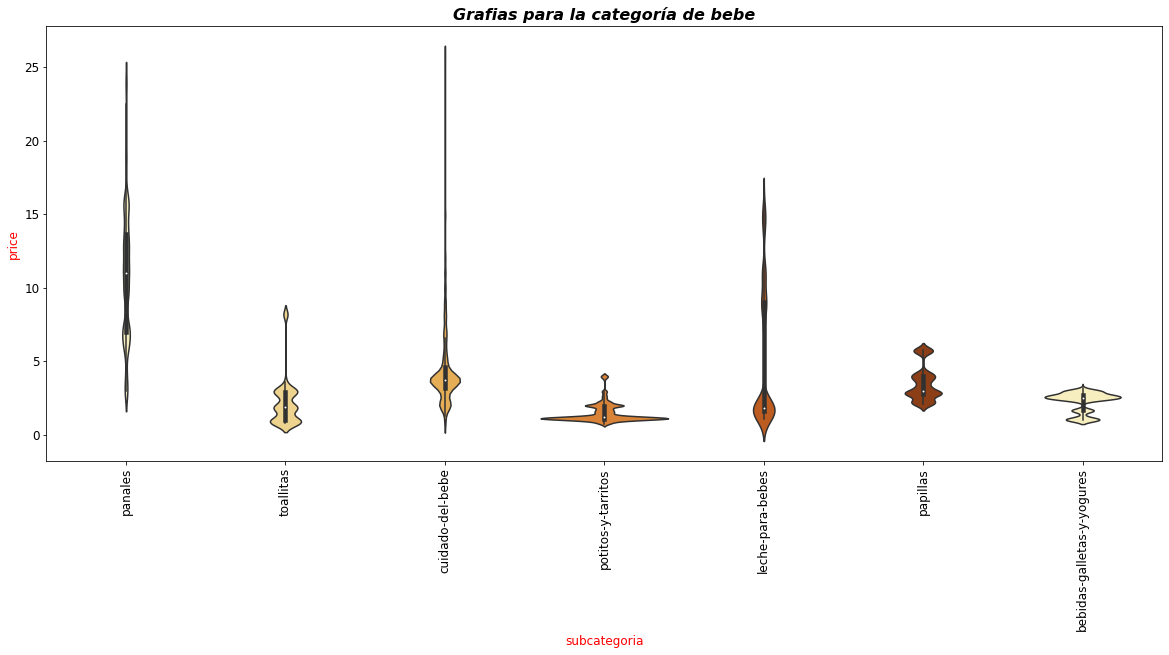

In [ ]:
crear_grafica(df_final2, "subcategoria", "price", "violinplot")

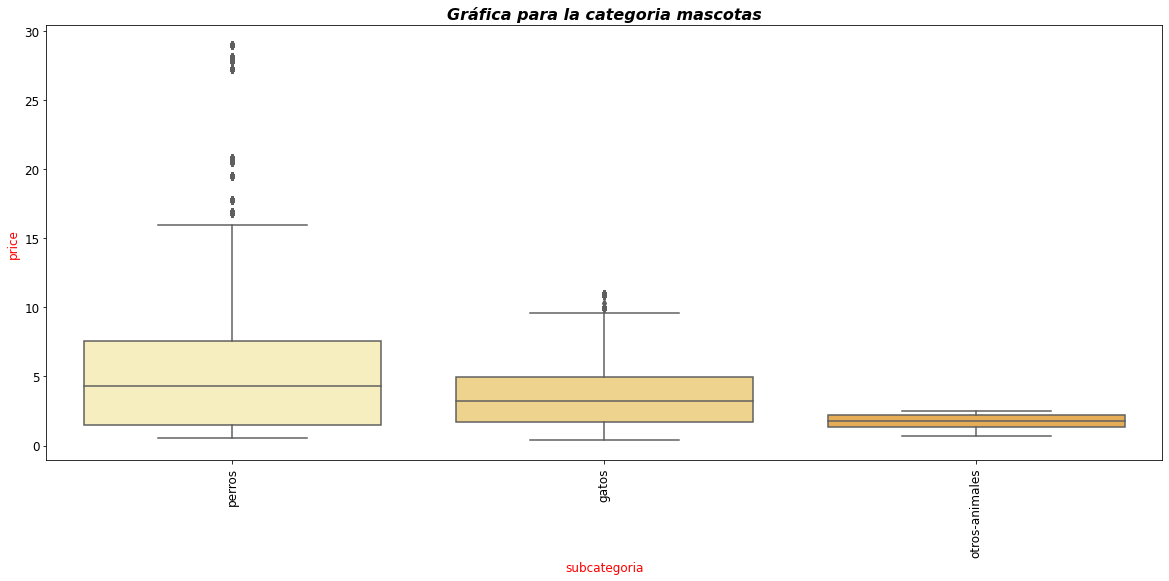

In [ ]:
crear_grafica(df_final2, "subcategoria", "price", "boxplot")

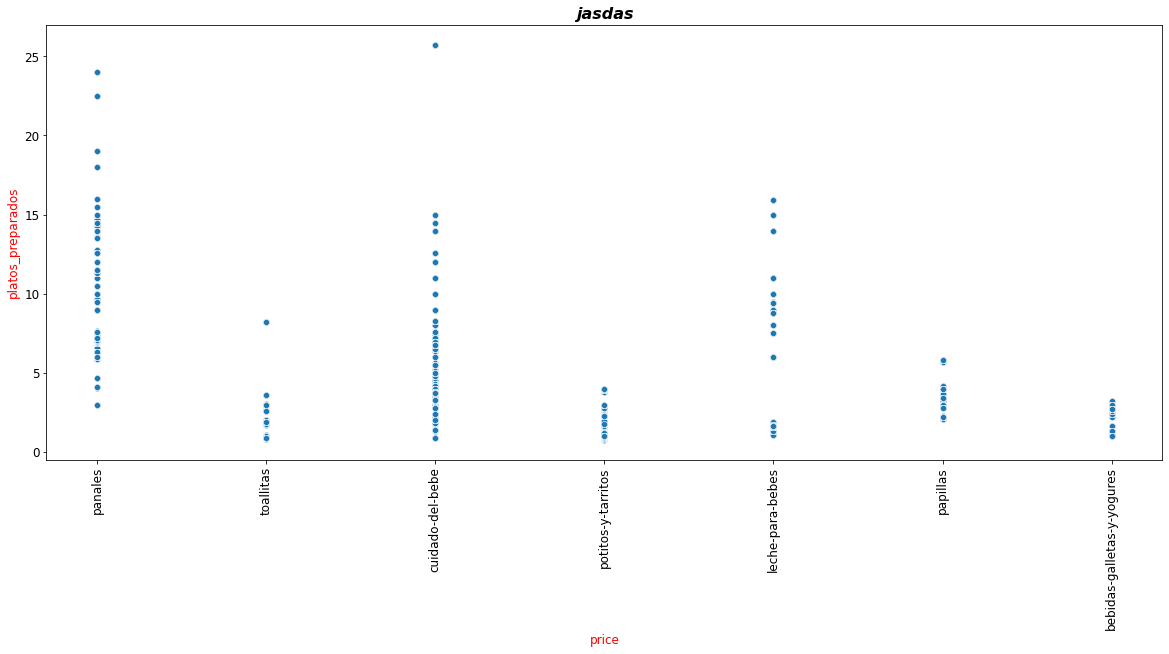

In [ ]:
crear_grafica(df_final2, "subcategoria", "price", "scatterplot")

**¿Qué categoría es la que tiene los precios más altos? ¿y los mínimos?**

Debatir aquí que diferencia hay entre la media y la mediana

In [ ]:
# categoria que tiene los precios más caros y los más baratos
df_final2.groupby(["categoria"])["price"].agg(["mean", "max", "min", "median"])

,mean,max,min,median
categoria,,,,
bebe,4.651540,25.74,0.75,3.29
bebidas,1.704661,14.99,0.15,1.19
bodega,6.317534,33.84,0.65,4.69
congelados,3.101052,22.89,0.49,2.59
conservas,4.193449,4.75,3.19,4.00
cuidado-corporal,1.490000,1.49,1.49,1.49
cuidado-del-hogar,3.663929,60.00,0.25,2.79
cuidado-personal,4.801269,44.99,0.65,3.39
desayunos-y-dulces,2.401873,2.49,2.39,2.39


In [ ]:
categorias = df_final2["categoria"].unique()

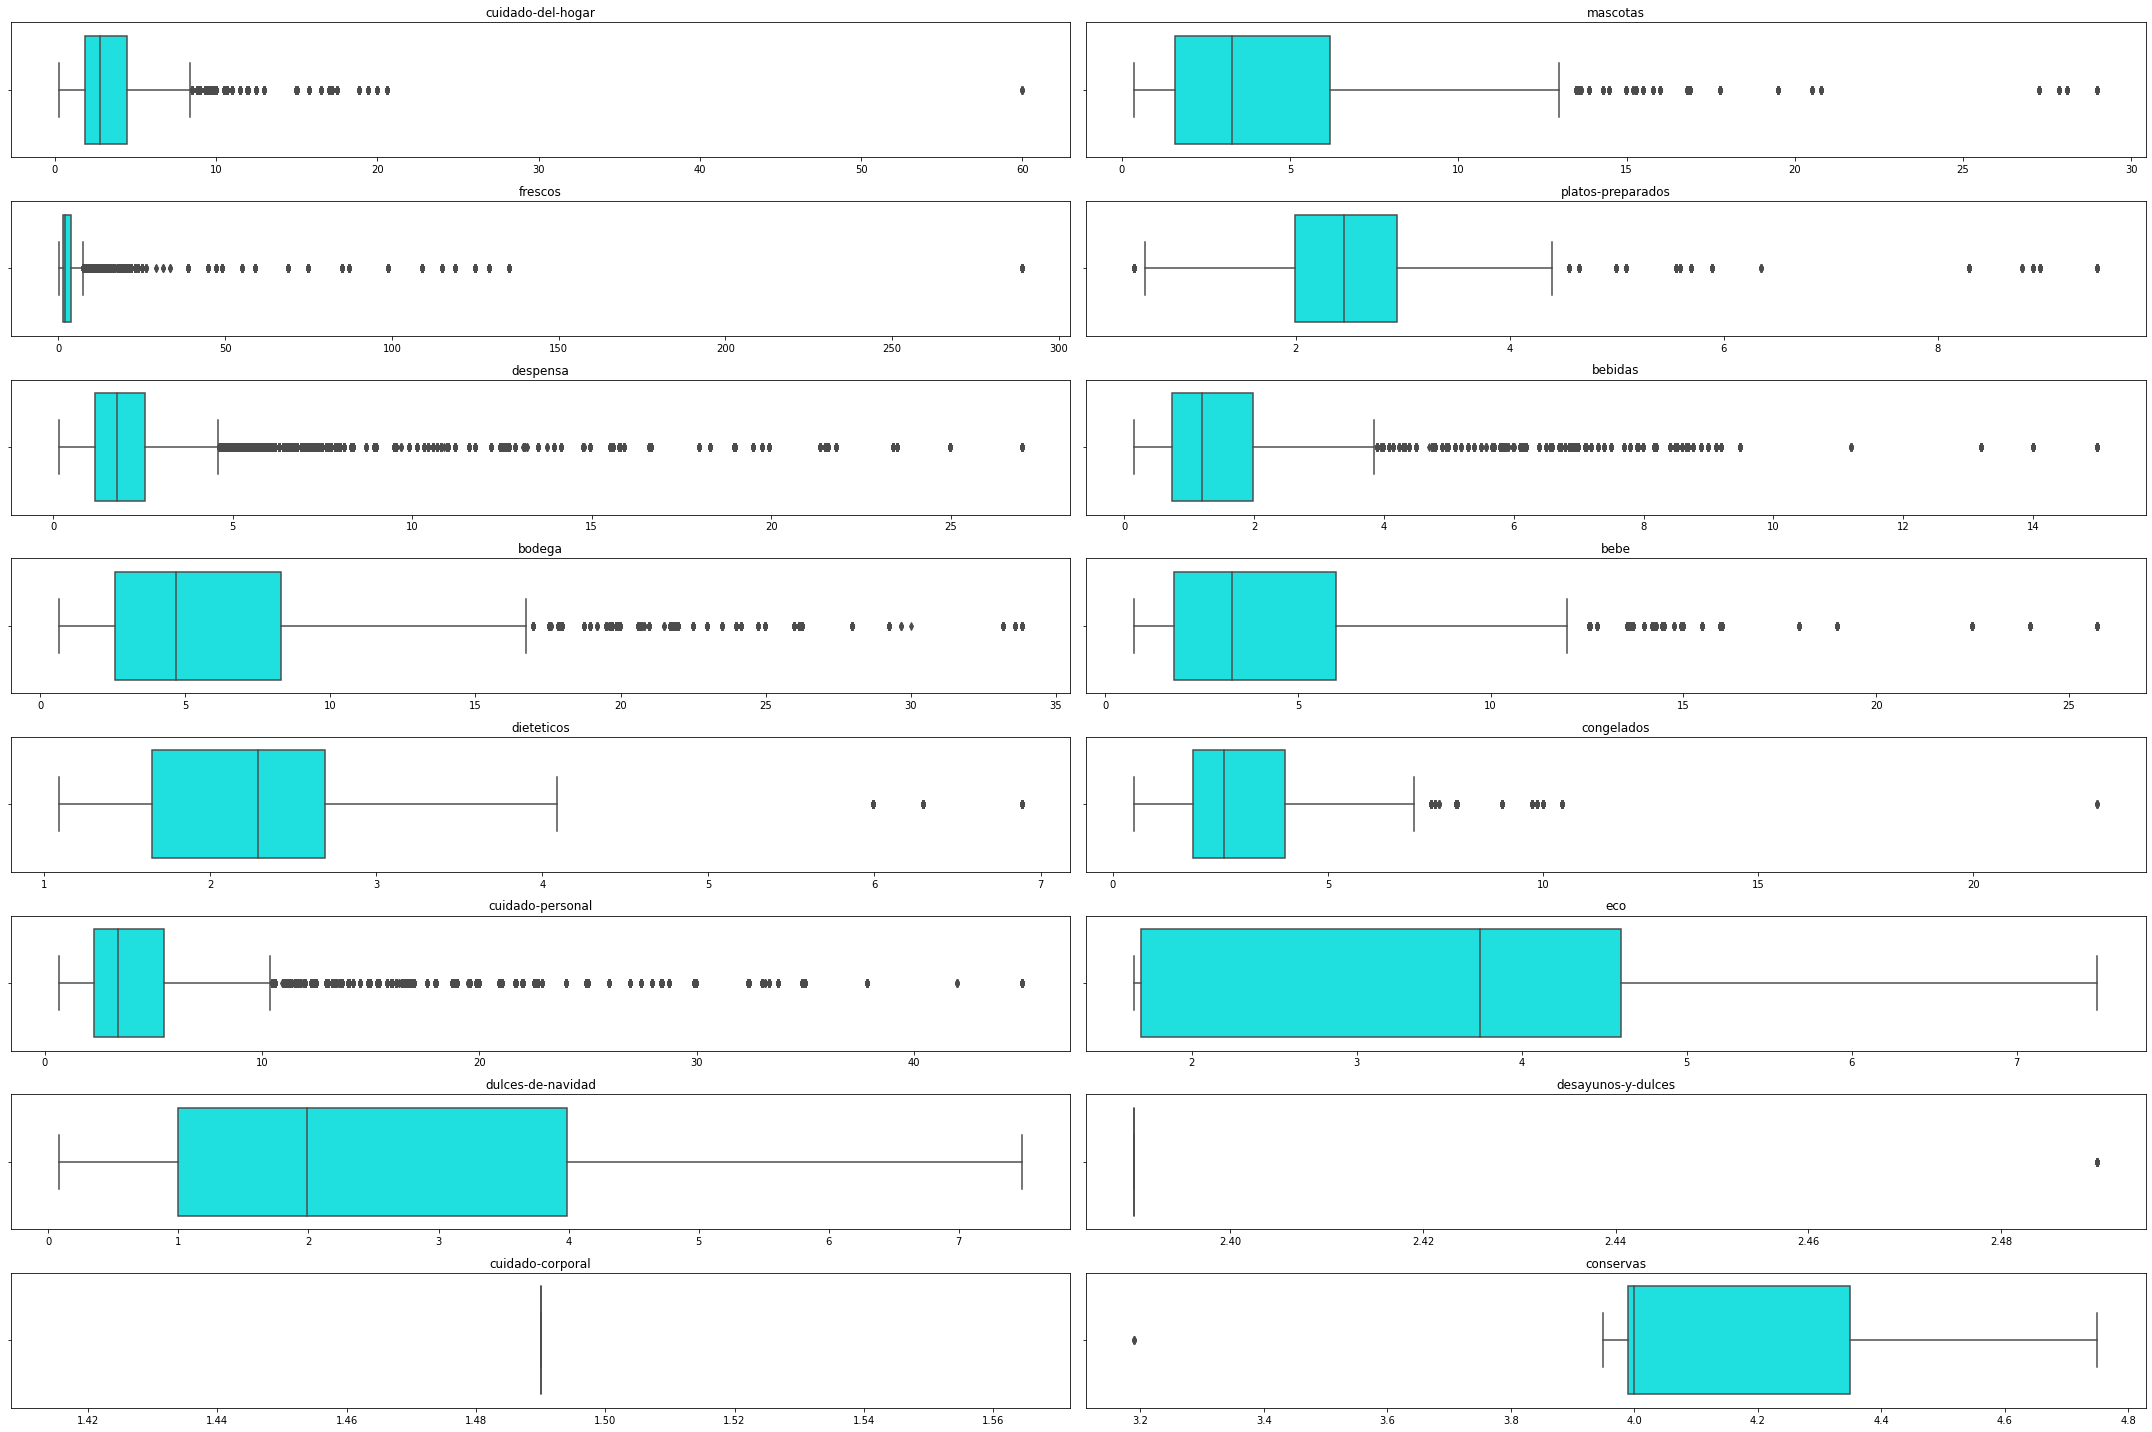

In [ ]:
fig, axes = plt.subplots(8, 2, figsize=(30,20))

axes = axes.flat

for indice, cate in enumerate(categorias):

    df_plot = df_final2[df_final2["categoria"] == cate]

    sns.boxplot(x = df_plot["price"], data = df_plot, ax=axes[indice], color = "cyan"); # para trazar una línea de densidad

    axes[indice].set_title(cate)
    axes[indice].set_xlabel("")

fig.tight_layout();




**Bonus**

Por si da tiempo, algo de fantasía con un pie chart y con nubes de palabras. 

In [ ]:
df_final2.head(1)

,price,reference_price,product_id,reference_unit,insert_date,url,supermarket,name,description,date,date2,difference,categoria,subcategoria
0,1.59,1.59,9e2fda45e63337294f2a604178823026,ud,2021-08-02 00:00:00,https://www.dia.es/compra-online/cuidado-del-h...,dia-es,MISTOL lavavajillas mano original botella 900 ml,NaN,2021-08-02,2021-08-02,0.0,cuidado-del-hogar,lavavajillas


In [ ]:
df_pie = pd.DataFrame(df_final2.groupby(['reference_unit'])
                      ["price"].mean()).reset_index()

df_pie

,reference_unit,price
0,kg,2.927636
1,l,3.741697
2,lavado,6.610188
3,m,2.169866
4,ud,4.294850


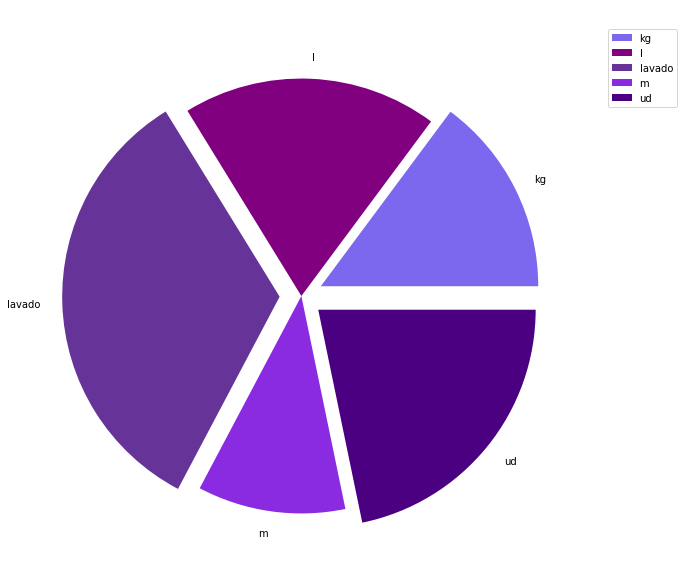

In [ ]:
colors = ['mediumslateblue', 'purple', 'rebeccapurple', 'blueviolet' ,'indigo'] # para establecer los colores

explode = ( 0.1 ,0, 0.5, 0, 0.1) # para sacar los quesitos hacia fuera

plt.figure(figsize=(10,10))

plt.pie(df_pie['price'], 
       labels = df_pie["reference_unit"], 
       colors = colors, # para cambiar el color de la gráfica
       explode = explode)  # para sacar los quesitos hacia fuera

plt.title("Precio medio por unidades", color = "white", fontsize = 16, fontweight = "bold") # para poner el título
plt.legend(bbox_to_anchor=(1.2, 1)) # sacar leyenda y donde colocarla. El primer índice (derecha-izquierda), segundo índice(arriba, abajo) )
plt.show();

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
def generate_cloud_normal(df, column):

    # Joining all the words in the description column into one string.
    text = " ".join(cat for cat in df[column])

    word_cloud = WordCloud(
        width=7000,
        height=2000,
        background_color="black",
        colormap="OrRd",
        collocations=True,
        stopwords=STOPWORDS,
        ).generate(text)

    # Showing the word cloud.
    plt.imshow(word_cloud)


    # Turning off the axis.
    plt.axis("off")

    # Showing the word cloud.
    plt.show()

    #word_cloud.to_file(f'../images/world_clouds/{filename}.png')

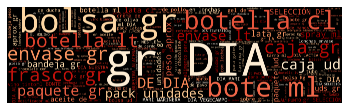

In [ ]:
generate_cloud_normal(df_final2, "name")